In [93]:
# This is for experimentation.
# Currently code includes for layer wise output features
# Open CV preprocessing

In [94]:
# Links and codes
#http://blog.kaggle.com/2017/12/22/carvana-image-masking-first-place-interview/
# 1st place solution
#https://github.com/asanakoy/kaggle_carvana_segmentation

# 2018 nuclei data science bowl
# https://www.kaggle.com/c/data-science-bowl-2018/data
# winners:https://datasciencebowl.com/2018winners/

# Mask rcnn by 3rd place winner: https://github.com/Gelu74/DSB_2018
# Lots others: https://github.com/Gelu74/DSB_2018/blob/master/README.md

# deeplab v3
# https://github.com/sthalles/deeplab_v3
# https://github.com/bonlime/keras-deeplab-v3-plus
#https://github.com/handong1587/handong1587.github.io/blob/master/_posts/deep_learning/2015-10-09-segmentation.md

#topcoders, 1st place solution
#https://www.kaggle.com/c/data-science-bowl-2018/discussion/54741
# Torch solution: https://github.com/neptune-ml/open-solution-data-science-bowl-2018

# 5th place keras solution (mask rcnn)
#https://github.com/mirzaevinom/data_science_bowl_2018/blob/master/codes/model.py

#http://blog.kaggle.com/2017/06/29/2017-data-science-bowl-predicting-lung-cancer-2nd-place-solution-write-up-daniel-hammack-and-julian-de-wit/

# Cardiac MRI segmentation
# Use the different models and see
# https://github.com/chuckyee/cardiac-segmentation/tree/master/rvseg/models

# 2017 national data science bowl
# https://www.kaggle.com/c/data-science-bowl-2017#description
# 2nd place solution for the 2017 national datascience bowl
#http://juliandewit.github.io/kaggle-ndsb2017/
# Top 2017 algo
# https://datasciencebowl.com/2017algorithms/

# Read lung segmentation blog
#http://blog.kaggle.com/2017/05/16/data-science-bowl-2017-predicting-lung-cancer-solution-write-up-team-deep-breath/

# Edge Detection
# Canny edge detector : https://docs.opencv.org/3.4.2/da/d22/tutorial_py_canny.html
# https://www.google.com/url?q=https://stackoverflow.com/questions/40725804/can-canny-in-opencv-deal-with-both-grayscale-and-color-images&sa=D&source=hangouts&ust=1533728302195000&usg=AFQjCNHDVTlm-0kHqXCb0NI5ANdbcYEG8g
# https://www.google.com/url?q=https://stackoverflow.com/questions/22064982/edge-detection-method-better-than-canny-edge-detection&sa=D&source=hangouts&ust=1533728272554000&usg=AFQjCNFdwFUzy1VuSYy9oQ8U20Mvj4vUiQ

In [95]:
# Conv operation: https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

In [96]:
import os
import sys
import random
import warnings
import time
import pprint as pp

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, imsave, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model

from keras.layers import Input
from keras.layers import BatchNormalization,Concatenate

from keras.layers.core import Lambda
from keras.layers.core import Dropout, Flatten

from keras.layers.convolutional import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as vgg16_preprocessing_input
from keras.applications.vgg16 import decode_predictions as vgg16_decode_predictions

from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as resnet50_preprocessing_input
from keras.applications.resnet50 import decode_predictions as resnet50_decode_predictions

from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input as inception_resnet_v2_preprocessing_input
from keras.applications.inception_resnet_v2 import decode_predictions as inception_resnet_v2_decode_predictions

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessing_input
from keras.applications.inception_v3 import decode_predictions as inception_v3_decode_predictions

from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input as xception_preprocessing_input
from keras.applications.xception import decode_predictions as xception_decode_predictions

from keras.applications.nasnet import NASNetLarge
from keras.applications.nasnet import preprocess_input as nasnet_preprocessing_input
from keras.applications.nasnet import decode_predictions as nasnet_decode_predictions

from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input as densenet_121_preprocess_input
from keras.applications.densenet import decode_predictions as densenet_121_decode_predictions

from keras.applications.densenet import DenseNet169
from keras.applications.densenet import preprocess_input as densenet_169_preprocess_input
from keras.applications.densenet import decode_predictions as densenet_169_decode_predictions

from keras.applications.densenet import DenseNet201
from keras.applications.densenet import preprocess_input as densenet_201_preprocess_input
from keras.applications.densenet import decode_predictions as densenet_201_decode_predictions



from keras.preprocessing import image

import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [97]:
# Set some parameters
im_width = 128
im_height = 128
orig_im_width = 101
orig_im_height = 101
im_chan = 1
# path_train = '../input/tgs-salt-identification-challenge/train/'
# path_test = '../input/tgs-salt-identification-challenge/test/'

#path_train = '../input/input2/small-input/train/'
#path_test = '../input/input2/small-input/test/'

path_train = '../input/train/'
path_test = '../input/test/'

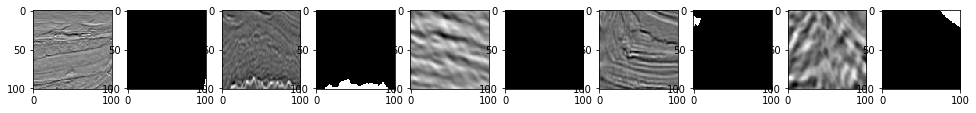

In [99]:
ids= ['00a3af90ab','0aab0afa9c','0ab5e14937','0a41de5e3b','0b9cb1205a']
plt.figure(figsize=(20,10))
for j, img_name in enumerate(ids):
    q = j+1
    img = load_img(path_train + 'images/' + img_name + '.png')
    img_mask = load_img(path_train + 'masks/' + img_name + '.png')
    
    plt.subplot(1,2*(1+len(ids)),q*2-1)
    plt.imshow(img)
    plt.subplot(1,2*(1+len(ids)),q*2)
    plt.imshow(img_mask)
plt.show()

In [100]:
train_ids = next(os.walk(path_train+"images"))[2]
test_ids = next(os.walk(path_test+"images"))[2]

In [101]:
img_size_ori = 101
img_size_target = 128

In [102]:
dataset_path = "" #"tgs-salt-identification-challenge/"
train_df = pd.read_csv("../input/"+ dataset_path + "train.csv", index_col="id", usecols=[0])
depths_df = pd.read_csv("../input/" + dataset_path + "depths.csv", index_col="id")
train_df = train_df.join(depths_df)
test_df = depths_df[~depths_df.index.isin(train_df.index)]

In [103]:
train_df["images"] = [np.array(load_img("../input/" + dataset_path + "train/images/{}.png".format(idx), grayscale=True)) / 255 for idx in tqdm_notebook(train_df.index)]

HBox(children=(IntProgress(value=0, max=4000), HTML(value='')))

/home/azehady/.local/lib/python3.6/site-packages/keras_preprocessing/image.py:489: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [104]:
train_df["masks"] = [np.array(load_img("../input/" + dataset_path + "train/masks/{}.png".format(idx), grayscale=True)) / 255 for idx in tqdm_notebook(train_df.index)]

HBox(children=(IntProgress(value=0, max=4000), HTML(value='')))

/home/azehady/.local/lib/python3.6/site-packages/keras_preprocessing/image.py:489: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [105]:
train_df["coverage"] = train_df.masks.map(np.sum) / pow(img_size_ori, 2)

In [106]:
train_df.head()

,z,images,masks,coverage
id,,,,
575d24d81d,843,"[[0.5254901960784314, 0.5137254901960784, 0.52...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.000000
a266a2a9df,794,"[[0.3411764705882353, 0.3764705882352941, 0.33...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.504950
75efad62c1,468,"[[0.5686274509803921, 0.4666666666666667, 0.32...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.993334
34e51dba6a,727,"[[0.5411764705882353, 0.4745098039215686, 0.39...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.149201
4875705fb0,797,"[[0.06666666666666667, 0.0784313725490196, 0.0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.042839


In [107]:
depths = [depths_df[depths_df.index == idx].z.values[0] for idx in depths_df.index if idx in train_df.index]

In [108]:
train_df['z'] = depths

In [109]:
train_df = train_df.sort_values(by='z')

In [110]:
train_df.head()

,z,images,masks,coverage
id,,,,
aa94cfb806,51,"[[0.5058823529411764, 0.49019607843137253, 0.4...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0.665817
d46c133c20,53,"[[0.5019607843137255, 0.4745098039215686, 0.45...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.000000
32f1039c61,54,"[[0.6745098039215687, 0.6823529411764706, 0.66...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0.351534
859f623d32,54,"[[0.20392156862745098, 0.20392156862745098, 0....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.000000
c45c9617bf,55,"[[1.0, 0.8549019607843137, 0.7137254901960784,...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0.305166


In [111]:
max_images = int(4000 / 15) * 15
print(max_images)

3990


Text(0.5,0.98,'Green: salt. Top-left: coverage class, top-right: salt coverage, bottom-left: depth')

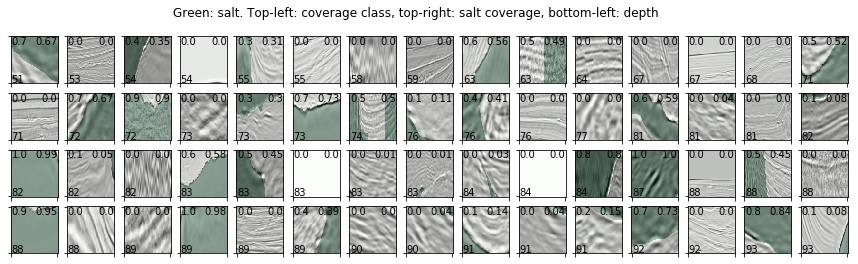

In [112]:
max_images = 60#int(4000 / 15) * 15
grid_width = 15
grid_height = int(max_images / grid_width)
fig, axs = plt.subplots(grid_height, grid_width, figsize=(grid_width, grid_height))
for i, idx in enumerate(train_df.index[:max_images]):
    img = train_df.loc[idx].images
    mask = train_df.loc[idx].masks
    ax = axs[int(i / grid_width), i % grid_width]
    ax.imshow(img, cmap="Greys")
    ax.imshow(mask, alpha=0.3, cmap="Greens")
    ax.text(1, img_size_ori-1, train_df.loc[idx].z, color="black")
    ax.text(img_size_ori - 1, 1, round(train_df.loc[idx].coverage, 2), color="black", ha="right", va="top")
    ax.text(1, 1, round(train_df.loc[idx].coverage, 1), color="black", ha="left", va="top")
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.suptitle("Green: salt. Top-left: coverage class, top-right: salt coverage, bottom-left: depth")


In [113]:

# Get and resize train images and masks
x_train = np.zeros((len(train_ids), im_height, im_width, im_chan), dtype=np.uint8)
y_train = np.zeros((len(train_ids), im_height, im_width, 1), dtype=np.bool)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm_notebook(enumerate(train_ids), total=len(train_ids)):
    path = path_train
    img = load_img(path + '/images/' + id_)
    x = img_to_array(img)[:,:,1]
    x = resize(x, (128, 128, 1), mode='constant', preserve_range=True)
    x_train[n] = x
    mask = img_to_array(load_img(path + '/masks/' + id_))[:,:,1]
    y_train[n] = resize(mask, (128, 128, 1), mode='constant', preserve_range=True)

print('Done!')

Getting and resizing train images and masks ... 


HBox(children=(IntProgress(value=0, max=4000), HTML(value='')))


Done!


/apps/cent7/anaconda/5.1.0-py36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


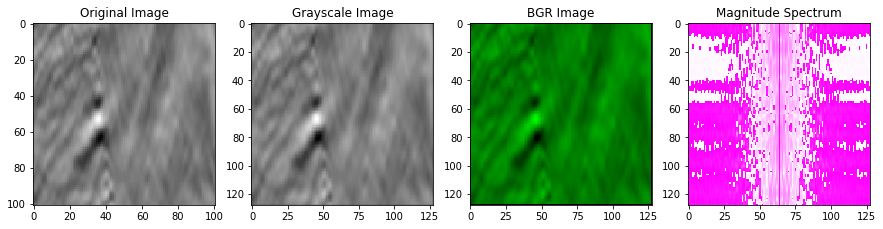

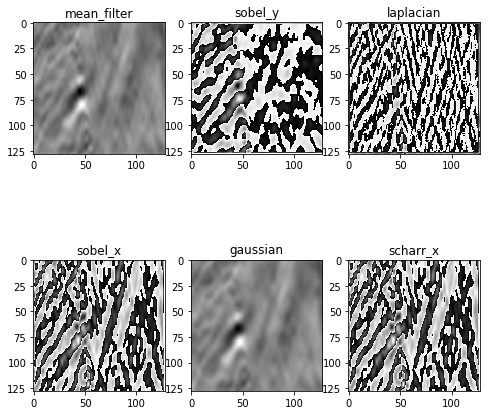

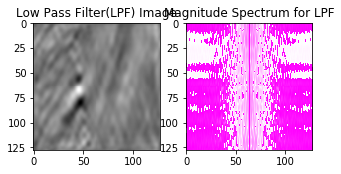

(128, 128, 3)


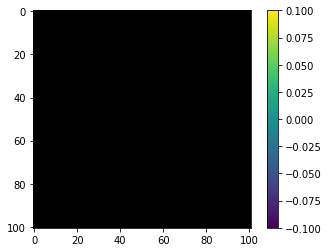

(<matplotlib.image.AxesImage at 0x2af084600b70>,
 None)

In [114]:
import cv2 as cv 

ix = random.randint(0, 4000)
img = cv.imread(path_train + 'images/' + train_ids[ix])
img_orig = np.copy(img)

bgrimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# reshaping the image
img = resize(img, (128, 128, 3)) #, mode='constant', preserve_range=True)
grayimg = np.copy(img[:, :, 0])
bgrimg = resize(bgrimg, (128, 128, 3)) #, mode='constant', preserve_range=True)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift + 1)) 
mx = np.max(np.abs(magnitude_spectrum))
mn = np.min(np.abs(magnitude_spectrum))
ms = (mx - magnitude_spectrum) / (mx - mn) 


f, ax = plt.subplots(1,4, figsize=(15,15))
ax[0].imshow(img_orig)
ax[0].set_title('Original Image')

ax[1].imshow(grayimg, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[2].imshow(bgrimg)
ax[2].set_title('BGR Image')
ax[3].imshow(ms)
ax[3].set_title('Magnitude Spectrum')
plt.show()

# Low Pass Filter
# create a mask first, center square is 1, remaining all zeros
rows, cols = grayimg.shape
crow, ccol = int(rows/2) , int(cols/2)      # center
fs = int(rows* 0.15)

mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-fs:crow+fs, ccol-fs:ccol+fs] = 1

# apply mask and inverse DFT
img_float32 = np.float32(grayimg)

dft = cv.dft(img_float32, flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
mfshift = dft_shift*mask
magnitude_spectrum2 = np.log(np.abs(mfshift + 1)) 
mx2 = np.max(np.abs(magnitude_spectrum2))
mn2 = np.min(np.abs(magnitude_spectrum2))
ms2 = (mx2 - magnitude_spectrum2) / (mx2 - mn2) 


mf_ishift = np.fft.ifftshift(mfshift)
img_back = cv.idft(mf_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])


import cv2
import numpy as np
from matplotlib import pyplot as plt

# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filter_num = 6
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]


f, ax = plt.subplots(2, 3, figsize=(8, 8))
for i in range(filter_num):
    rx = ((i+1) % 2) - 1
    ry = ((i+1) % 3) - 1
    f_img = cv.filter2D(img, -1, filters[i])
    mx = np.max(np.abs(f_img))
    mn = np.min(np.abs(f_img))
    f_img = (mx - f_img) / (mx - mn)
    ax[rx][ry].imshow(f_img,cmap = 'gray')
    ax[rx][ry].set_title(filter_name[i])
plt.show()

f, ax = plt.subplots(1,2, figsize=(5, 5))
ax[0].imshow(img_back, cmap='gray')
ax[0].set_title('Low Pass Filter(LPF) Image')
ax[1].imshow(ms)
ax[1].set_title('Magnitude Spectrum for LPF')
plt.show()


print(bgrimg.shape)
imgN = cv.imread(path_train + 'images/' + train_ids[ix]) #cv.cvtColor(img_orig, cv.COLOR_GRAY2RGB) #cv.cvtColor(img, cv2.COLOR_BGR)
mask = np.zeros(imgN.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv.grabCut(imgN,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
newimg = imgN*mask2[:,:,np.newaxis]

plt.imshow(newimg),plt.colorbar(),plt.show()


In [115]:
salt_train_df = train_df[train_df.coverage != 0]
nosalt_train_df = train_df[train_df.coverage == 0]
print(salt_train_df.describe())
print(nosalt_train_df.describe())
print(len(salt_train_df))
print(salt_train_df.head())

                 z     coverage
count  2438.000000  2438.000000
mean    508.730517     0.406835
std     207.895518     0.318832
min      51.000000     0.000098
25%     353.000000     0.110234
50%     518.000000     0.363886
75%     674.000000     0.665719
max     959.000000     0.999902
                 z  coverage
count  1562.000000    1562.0
mean    503.547375       0.0
std     208.137094       0.0
min      53.000000       0.0
25%     347.250000       0.0
50%     505.500000       0.0
75%     661.000000       0.0
max     956.000000       0.0
2438
             z                                             images  \
id                                                                  
aa94cfb806  51  [[0.5058823529411764, 0.49019607843137253, 0.4...   
32f1039c61  54  [[0.6745098039215687, 0.6823529411764706, 0.66...   
c45c9617bf  55  [[1.0, 0.8549019607843137, 0.7137254901960784,...   
6f5c2712b1  63  [[0.36470588235294116, 0.40784313725490196, 0....   
ad2fa649f7  63  [[0.211764705882

Salt image id : aff87f7ba7


/apps/cent7/anaconda/5.1.0-py36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


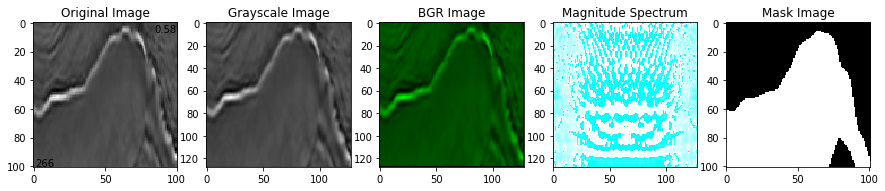

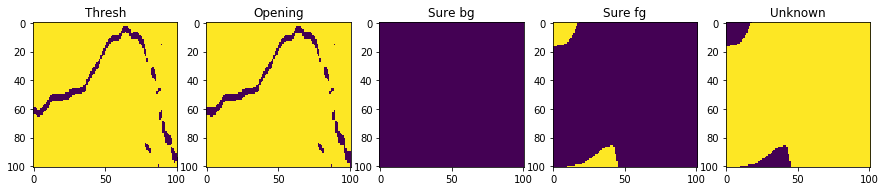

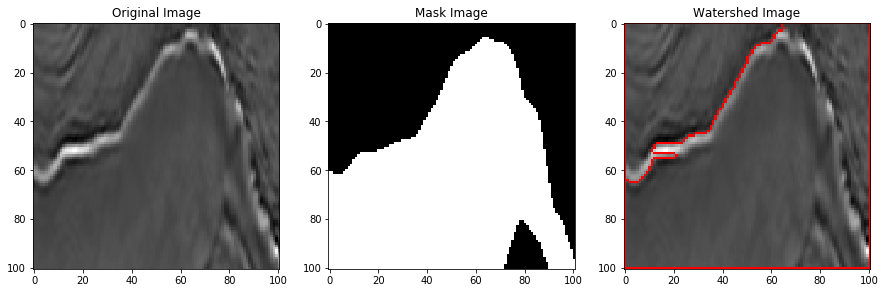

Non Salt image id : 337b30caff


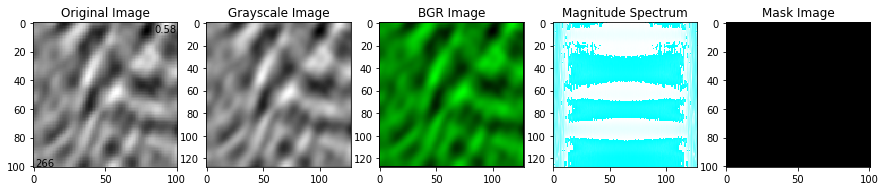

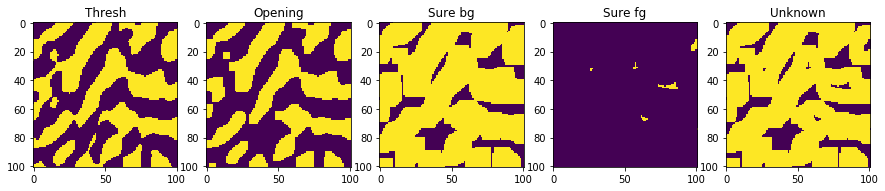

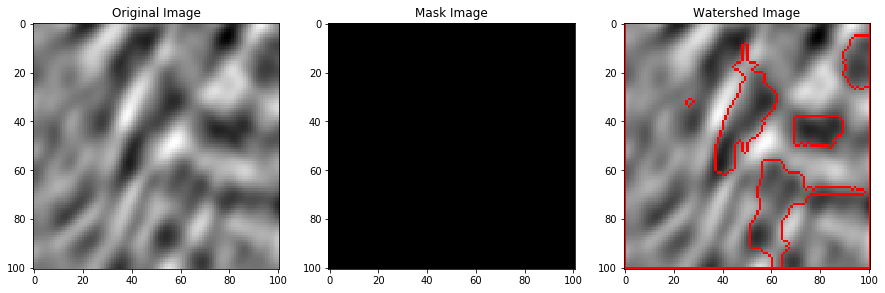

In [119]:
# For salt image
img_size_ori = 101
ix = random.randint(0, len(salt_train_df))
idx = img_id = salt_train_df.index.values[ix]
print("Salt image id : " + str(img_id))
img = cv.imread(path_train + 'images/' + img_id + '.png')
mask = cv.imread(path_train + 'masks/' + img_id + '.png')


img_orig = np.copy(img)

bgrimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# reshaping the image
img = resize(img, (128, 128, 3)) #, mode='constant', preserve_range=True)
grayimg = np.copy(img[:, :, 0])
bgrimg = resize(bgrimg, (128, 128, 3)) #, mode='constant', preserve_range=True)

f = np.fft.fft2(img)
#fshift = np.fft.fftshift(f)
fshift = f
magnitude_spectrum = np.log(np.abs(fshift + 1)) 
mx = np.max(np.abs(magnitude_spectrum))
mn = np.min(np.abs(magnitude_spectrum))
ms = (mx - magnitude_spectrum) / (mx - mn) 


f, ax = plt.subplots(1,5, figsize=(15,15))
ax[0].imshow(img_orig)
ax[0].set_title('Original Image')
ax[0].text(1, img_size_ori-1, train_df.loc[idx].z, color="black")
ax[0].text(img_size_ori - 1, 1, round(train_df.loc[idx].coverage, 2), color="black", ha="right", va="top")
#ax[0].text(1, 1, train_df.loc[idx].coverage_class, color="black", ha="left", va="top")
    
ax[1].imshow(grayimg, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[2].imshow(bgrimg)
ax[2].set_title('BGR Image')
ax[3].imshow(ms)
ax[3].set_title('Magnitude Spectrum')
ax[4].imshow(mask)
ax[4].set_title('Mask Image')
plt.show()

# Watershed
fig, ax = plt.subplots(1, 5, figsize=(15, 15))
img = np.copy(img_orig)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ax[0].imshow(thresh)
ax[0].set_title("Thresh")

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
ax[1].imshow(opening)
ax[1].set_title("Opening")

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
ax[2].imshow(sure_bg)
ax[2].set_title("Sure bg")

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
ax[3].imshow(sure_fg)
ax[3].set_title("Sure fg")

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
ax[4].imshow(unknown)
ax[4].set_title("Unknown")
plt.show()

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

f, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(mask,cmap = 'gray')
ax[1].set_title('Mask Image')
ax[2].imshow(img,cmap = 'gray')
ax[2].set_title('Watershed Image')
plt.show()


# For nosalt image
ix = random.randint(0, len(nosalt_train_df))
img_id = nosalt_train_df.index.values[ix]
print("Non Salt image id : " + str(img_id))
img = cv.imread(path_train + 'images/' + img_id + '.png')
mask = cv.imread(path_train + 'masks/' + img_id + '.png')


img_orig = np.copy(img)

bgrimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# reshaping the image
img = resize(img, (128, 128, 3)) #, mode='constant', preserve_range=True)
grayimg = np.copy(img[:, :, 0])
bgrimg = resize(bgrimg, (128, 128, 3)) #, mode='constant', preserve_range=True)

f = np.fft.fft2(img)
#fshift = np.fft.fftshift(f)
fshift = f
magnitude_spectrum = np.log(np.abs(fshift + 1)) 
mx = np.max(np.abs(magnitude_spectrum))
mn = np.min(np.abs(magnitude_spectrum))
ms = (mx - magnitude_spectrum) / (mx - mn) 


f, ax = plt.subplots(1,5, figsize=(15,15))
ax[0].imshow(img_orig)
ax[0].set_title('Original Image')
ax[0].text(1, img_size_ori-1, train_df.loc[idx].z, color="black")
ax[0].text(img_size_ori - 1, 1, round(train_df.loc[idx].coverage, 2), color="black", ha="right", va="top")
ax[1].imshow(grayimg, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[2].imshow(bgrimg)
ax[2].set_title('BGR Image')
ax[3].imshow(ms)
ax[3].set_title('Magnitude Spectrum')
ax[4].imshow(mask)
ax[4].set_title('Mask Image')
plt.show()

# Watershed
fig, ax = plt.subplots(1, 5, figsize=(15, 15))
img = np.copy(img_orig)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ax[0].imshow(thresh)
ax[0].set_title("Thresh")

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
ax[1].imshow(opening)
ax[1].set_title("Opening")

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
ax[2].imshow(sure_bg)
ax[2].set_title("Sure bg")

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
ax[3].imshow(sure_fg)
ax[3].set_title("Sure fg")

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
ax[4].imshow(unknown)
ax[4].set_title("Unknown")
plt.show()

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

f, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(mask,cmap = 'gray')
ax[1].set_title('Mask Image')
ax[2].imshow(img,cmap = 'gray')
ax[2].set_title('Watershed Image')
plt.show()


In [83]:
dataset2_path = 'models/' #'u-net-dropout-augmentation-stratification/'
model = load_model("../input/" + dataset2_path + "keras-augment-fine-strat.model")

ec10996820.png


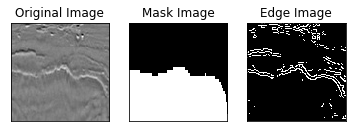

NameError: name 'model' is not defined

In [71]:
# Preprocessing
# Open CV image processing

import cv2 as cv
import random
import os
import matplotlib.pyplot as plt
import numpy as np

im_width = 128
im_height = 128
orig_im_width = 101
orig_im_height = 101
im_chan = 1
path_train = '../input/train/'
#path_test = '../input/test/'

train_ids = next(os.walk(path_train+"images"))[2]
#test_ids = next(os.walk(path_test+"images"))[2]


ix = random.randint(0, len(train_ids))
print(train_ids[ix])
from keras.preprocessing.image import img_to_array

img = cv.imread(path_train + 'images/' + train_ids[ix])
mask = cv.imread(path_train + 'masks/' + train_ids[ix])
edges = cv.Canny(img,128,128)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(mask,cmap = 'gray')
plt.title('Mask Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Model
pred_img = model.predict(x_train[(ix-1):(ix+1)]).reshape(-1, img_size_target, img_size_target)
print(pred_img.shape)

plt.imshow(pred_img[1], cmap='gray')
plt.title('Predicted Image')
plt.show()

# watershed
previmg = np.copy(img)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh)
plt.title("Thresh")
plt.show()
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening)
plt.title("Opening")
plt.show()

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg)
plt.title("Sure bg")
plt.show()

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.imshow(sure_fg)
plt.title("Sure fg")
plt.show()

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
plt.imshow(unknown)
plt.title("Unknown")
plt.show()

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.subplot(131),plt.imshow(previmg, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(mask,cmap = 'gray')
plt.title('Mask Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img,cmap = 'gray')
plt.title('Watershed Image'), plt.xticks([]), plt.yticks([])
plt.show()

img = np.copy(previmg)

#

# Fourier transform
previmg = np.copy(img)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift + 1))

plt.subplot(121),plt.imshow(img, cmap = 'Greys')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'Greys')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

img = np.copy(previmg)


# histogram
hist = cv.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

# contours
previmg = np.copy(img)

im = img
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

imContour = cv.drawContours(img, contours, -1, (0,255,0), 3)
plt.imshow(imContour)
plt.show()

img = np.copy(previmg)

# Gradient - Laplacian and Sobel Transform
laplacian = cv.Laplacian(img,cv.CV_64F)

laplacian = (np.max(laplacian) - laplacian)/(np.max(laplacian) - np.min(laplacian))

sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobelx = (np.max(sobelx) - sobelx) / (np.max(sobelx) - np.min(sobelx))
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
sobely = (np.max(sobely) - sobely) / (np.max(sobely) - np.min(sobely))

# Scharr derivative
#https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=scharr#cv2.Scharr
scharrx = cv.Scharr(img,cv.CV_64F,1,0)
scharrx = (np.max(scharrx) - scharrx) / (np.max(scharrx) - np.min(scharrx))
scharry = cv.Scharr(img,cv.CV_64F,0,1)
scharry = (np.max(scharry) - sobely) / (np.max(scharry) - np.min(scharry))


plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(laplacian, cmap= "gray")
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(1,2,1),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(1,2,1),plt.imshow(scharrx,cmap = 'gray')
plt.title('Scharr X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(scharry,cmap = 'gray')
plt.title('Scharr Y'), plt.xticks([]), plt.yticks([])
plt.show()

# Erosion
rows,cols,ch = img.shape
kernel = np.ones((5,5), np.uint8)
M = cv.erode(img, kernel, iterations = 2)
plt.subplot(121),plt.imshow(M),plt.title('Erosion')

# Dilation
M = cv.dilate(img, kernel, iterations = 2)
plt.subplot(122),plt.imshow(M),plt.title('Dilation')
plt.show()

# Opening 
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
plt.subplot(121),plt.imshow(opening),plt.title('Opening (Erosion + Dilation)')

closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.subplot(122),plt.imshow(opening),plt.title('Opening (Dilation + Erosion)')

plt.show()

# Morphological Gradient
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
plt.subplot(121),plt.imshow(gradient),plt.title('Morph Grad')
plt.show()

tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
plt.subplot(121),plt.imshow(tophat),plt.title('Top Hat')

blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
plt.subplot(122),plt.imshow(blackhat),plt.title('Black Hat')

plt.show()

cross = cv.morphologyEx(img, cv.MORPH_CROSS, kernel)
plt.subplot(121),plt.imshow(cross),plt.title('Cross')

ellipse = cv.morphologyEx(img, cv.MORPH_ELLIPSE, kernel)
plt.subplot(122),plt.imshow(ellipse),plt.title('Ellipse')

plt.show()

rect = cv.morphologyEx(img, cv.MORPH_RECT, kernel)
plt.subplot(122),plt.imshow(rect),plt.title('Rect')

# hitmiss = cv.morphologyEx(img, cv.MORPH_HITMISS, kernel)
# plt.subplot(122),plt.imshow(hitmiss),plt.title('HitMiss')

plt.show()


# # Hough Transforms
# previmg = np.copy(img)

# img = previmg
# gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# edges = cv.Canny(gray,50,150,apertureSize = 3)
# lines = cv.HoughLines(edges,1,np.pi/180,200)
# if lines != None:
#  for line in lines:
#     rho,theta = line[0]
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000*(-b))
#     y1 = int(y0 + 1000*(a))
#     x2 = int(x0 - 1000*(-b))
#     y2 = int(y0 - 1000*(a))
#     cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)
# else:
#     print("No Hough trans. Because None")
    
# plt.imshow(img)
# plt.show()
# img = np.copy(previmg)

# # Hough Circles
# previmg = np.copy(img)
# img = cv.medianBlur(img,5)
# cimg = img #cv.cvtColor(img,cv.COLOR_GRAY2BGR)
# circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
#                             param1=50,param2=30,minRadius=0,maxRadius=0)
# circles = np.uint16(np.around(circles))
# for i in circles[0,:]:
#     # draw the outer circle
#     cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
#     # draw the center of the circle
#     cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
# cv.imshow('detected circles',cimg)
# cv.waitKey(0)
# cv.destroyAllWindows()

# img = np.copy(previmg)




In [ ]:

# Old code

# Get and resize train images and masks
X_train = np.zeros((len(train_ids), im_height, im_width, im_chan), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), im_height, im_width, 1), dtype=np.bool)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm_notebook(enumerate(train_ids), total=len(train_ids)):
    path = path_train
    img = load_img(path + '/images/' + id_)
    x = img_to_array(img)[:,:,1]
    x = resize(x, (128, 128, 1), mode='constant', preserve_range=True)
    X_train[n] = x
    mask = img_to_array(load_img(path + '/masks/' + id_))[:,:,1]
    Y_train[n] = resize(mask, (128, 128, 1), mode='constant', preserve_range=True)

print('Done!')

# Build U-Net model
inputs = Input((im_height, im_width, im_chan))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (s)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4)
c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])
model.summary()

earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-tgs-salt-1.h5', verbose=1, save_best_only=True)
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=8, epochs=30, 
                    callbacks=[earlystopper, checkpointer])

In [ ]:
# Get and resize train images and masks
X_train_orig_img = [None]
X_train_gray_img = [None]
X_train_rgb_img = np.zeros((len(train_ids), im_height, im_width, 3), dtype=np.uint8)
X_train = np.zeros((len(train_ids), im_height, im_width, im_chan), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), im_height, im_width, 1), dtype=np.bool)
Y_train_mask_img = np.zeros((len(train_ids), im_height, im_width, 3), dtype=np.uint8)
Y_train_orig_mask_img = [None]
img_ids = []
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm_notebook(enumerate(train_ids), total=len(train_ids)):
    path = path_train
    img_ids.append(id_)
    img = load_img(path + '/images/' + id_)
    x_img = img_to_array(img)
    X_train_orig_img.append(x_img)
    x_img = resize(x_img, (im_width, im_height, 3), mode='constant', preserve_range=True)
    X_train_rgb_img[n] = x_img
    x = img_to_array(img)[:,:,1]
    #X_train_gray_img.append(x)
    x = resize(x, (im_width, im_height, 1), mode='constant', preserve_range=True)
    X_train[n] = x
    mask_img = load_img(path + '/masks/' + id_)
    Y_train_orig_mask_img.append(mask_img)
    mask = img_to_array(mask_img)
    mask_img = resize(mask, (im_width, im_height, 3), mode='constant', preserve_range=True)
    Y_train_mask_img[n] = mask_img
    Y_train[n] = resize(mask[:,:,1], (im_width, im_height, 1), mode='constant', preserve_range=True)
    
print('Done!')

In [ ]:
ix = random.randint(0, X_train.shape[0])
print(ix)
im_id = img_ids[ix-1]
print(im_id)

img = img_to_array(X_train_rgb_img[ix])
mask = img_to_array(Y_train_mask_img[ix])

#img[,:,:]

plt.subplot(1,4,1)
plt.imshow(img)
plt.subplot(1,4,2)
#plt.imshow(X_train_gray_img[ix], cmap='gray')
plt.imshow(X_train_rgb_img[ix])
plt.subplot(1,4,3)
plt.imshow(Y_train_orig_mask_img[ix+1])
plt.subplot(1,4,4)
plt.imshow(mask)
plt.show()

print(img.shape)
print(mask.shape)
mask_inv = 255 - mask 

#res = cv2.bitwise_and(img, img, mask = mask)
res1 = mask * img
plt.subplot(1,5,1)
plt.imshow(res1)
res2 = mask_inv * img

R_chan = 0
G_chan = 1
B_chan = 2
for x1 in range(im_width):
    for x2 in range(im_height):
            if x1 < im_width - 1 and x2 < im_height - 1 and res2[x1,x2, G_chan] == 0: # when green channel is 0, color with red
            #if res2[x1,x2, G_chan] == 0: # when green channel is 0, color with red
                res2[x1,x2, R_chan] = 100

plt.subplot(1,5,2)
plt.imshow(res2)
                
res3 = res1+res2
plt.subplot(1,5,3)
plt.imshow(res3)

res4 = res3 * mask
plt.subplot(1,5,4)
plt.imshow(res4)

res5 = res2 * mask
plt.subplot(1,5,5)
plt.imshow(res5)
plt.show()

In [ ]:
# build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=False)
print('Model loaded.')

#model.summary()

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [ ]:
smooth = 1.

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

# Define IoU metric
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

def conv_block(m, dim, acti, bn, res, do=0):
	n = Conv2D(dim, 3, activation=acti, padding='same')(m)
	n = BatchNormalization()(n) if bn else n
	n = Dropout(do)(n) if do else n
	n = Conv2D(dim, 3, activation=acti, padding='same')(n)
	n = BatchNormalization()(n) if bn else n
	return Concatenate()([m, n]) if res else n

def level_block(m, dim, depth, inc, acti, do, bn, mp, up, res):
	if depth > 0:
		n = conv_block(m, dim, acti, bn, res)
		m = MaxPooling2D()(n) if mp else Conv2D(dim, 3, strides=2, padding='same')(n)
		m = level_block(m, int(inc*dim), depth-1, inc, acti, do, bn, mp, up, res)
		if up:
			m = UpSampling2D()(m)
			m = Conv2D(dim, 2, activation=acti, padding='same')(m)
		else:
			m = Conv2DTranspose(dim, 3, strides=2, activation=acti, padding='same')(m)
		n = Concatenate()([n, m])
		m = conv_block(n, dim, acti, bn, res)
	else:
		m = conv_block(m, dim, acti, bn, res, do) # do dropout for last layer
	return m

def UNet(img_shape, out_ch=1, start_ch=64, depth=4, inc_rate=2., activation='relu', 
		 dropout=0.5, batchnorm=False, maxpool=True, upconv=True, residual=False):
	i = Input(shape=img_shape)
	o = level_block(i, start_ch, depth, inc_rate, activation, dropout, batchnorm, maxpool, upconv, residual)
	o = Conv2D(out_ch, 1, activation='sigmoid')(o)
	return Model(inputs=i, outputs=o)

In [ ]:
# Build U-Net model
#img_shape = (im_height, im_width, im_chan)
img_shape = (im_height, im_width, 3)
inputs = Input(img_shape)
s = Lambda(lambda x: x / 255) (inputs)

model = UNet(img_shape, out_ch = 3, start_ch=8, depth=4, dropout=0.5, batchnorm=True)
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mean_iou'])
model.compile(optimizer='adam', loss=dice_coef_loss, metrics = [dice_coef])
model.summary()

In [ ]:
# build the VGG16 network with ImageNet weights
#model_path = '../input/unet-model/'
model_path = '../working/'
model_file = 'model-tgs-salt-1.h5'
#model_file = 'model-tgs-salt-3-dropout-0.5-batchnorm.h5'

model = load_model(model_path + model_file, custom_objects={'mean_iou': mean_iou})
print('Model loaded.')

model.summary()

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [ ]:
# this is the placeholder for the input images
input_img = model.input

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
pp.pprint(layer_dict)
# the name of the layer we want to visualize
# (see model definition at keras/applications/vgg16.py)
#layer_name = 'block5_conv3'
layer_name = 'conv2d_145'

# dimensions of the generated pictures for each filter.
img_width = 128
img_height = 128

# number of filters in the layer to process
filter_num = 128

In [ ]:
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())

def layer_wise_filter_gradient_loss(input_img_data, layer_name, filter_num, input_data_provided=False):
    kept_filters = []
    input_img = model.input
    for filter_index in range(filter_num):
        # we only scan through the first filter_num filters,
        print('Processing filter %d' % filter_index)
        start_time = time.time()

        # we build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        layer_output = layer_dict[layer_name].output
        if K.image_data_format() == 'channels_first':
            loss = K.mean(layer_output[:, filter_index, :, :])
        else:
            loss = K.mean(layer_output[:, :, :, filter_index])

        # we compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, input_img)[0]

        # normalization trick: we normalize the gradient
        grads = normalize(grads)

        # this function returns the loss and grads given the input picture
        iterate = K.function([input_img], [loss, grads])

        # step size for gradient ascent
        step = 1.

        # we start from a gray image with some random noise
        if input_data_provided == False:    
            if K.image_data_format() == 'channels_first':
                input_img_data = np.random.random((1, 3, img_width, img_height))
            else:
                input_img_data = np.random.random((1, img_width, img_height, 3))
            
            input_img_data = (input_img_data - 0.5) * 20 + 128

        # we run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([input_img_data])
            input_img_data += grads_value * step

            print('Current loss value:', loss_value)
            if loss_value <= 0.:
                # some filters get stuck to 0, we can skip them
                break

        # decode the resulting input image
        if loss_value > 0:
            img = deprocess_image(input_img_data[0])
            kept_filters.append((img, loss_value))
        end_time = time.time()
        print('Filter %d processed in %ds' % (filter_index, end_time - start_time))
    
    return(kept_filters)

In [ ]:
ix=10
img_width = 128
img_height = 128
print(ix)
#print(X_train_rgb_img[ix].shape)
img = X_train[ix]
#img = X_train_rgb_img[ix]


#X = img.reshape((1, img_width, img_height, 3)).astype(np.float32)
X = img.reshape((1, img_width, img_height, 1)).astype(np.float32)

plt.imshow(np.dstack((X_train[ix],X_train[ix],X_train[ix])))
#X = (X / 255.).astype(np.float32)
#plt.imshow(img)
plt.show()
print(X.shape)

In [ ]:
layer_name = 'conv2d_145'
filter_num = 16
kept_filters = layer_wise_filter_gradient_loss(X, layer_name, filter_num, input_data_provided=True)

In [ ]:
# we will stich the best 64 filters on a 8 x 8 grid.
#plt.imshow(X_train_rgb_img[ix])
#plt.imshow(np.dstack((X_train[ix],X_train[ix],X_train[ix])))
#plt.show()

Y = (Y_train[ix]).astype(np.float32).reshape((im_width, im_height, 1))
#plt.imshow(np.dstack((Y,Y,Y)))
#plt.show()
n = 4
margin = n

# the filters that have the highest loss are assumed to be better-looking.
# we will only keep the top 64 filters.
kept_filters.sort(key=lambda x: x[1], reverse=True)
kept_filters = kept_filters[:n * n]

# build a black picture with enough space for
# our 8 x 8 filters of size 128 x 128, with a 5px margin in between

width = n * img_width + (n - 1) * margin
height = n * img_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

# fill the picture with our saved filters
for i in range(n):
    for j in range(n):
        try:
            img, loss = kept_filters[i * n + j]
        except IndexError:
            break
        #plt.imshow(img)
        plt.imshow(np.dstack((img, img, img)))
        plt.show()
        stitched_filters[(img_width + margin) * i: (img_width + margin) * i + img_width,
                         (img_height + margin) * j: (img_height + margin) * j + img_height, :] = img

# save the result to disk
#s = (stitched_filters / 255.).astype(np.float32)

plt.imshow(stitched_filters, interpolation='nearest', aspect='auto')
plt.show()

#fname = '../working/' + 'stitched_filters_%dx%d.png' % (n, n)
#plt.imsave(fname, s)


In [ ]:
from keras import backend as K

layer_name = 'block5_conv3'
filter_index = 0  # can be any integer from 0 to 511, as there are 512 filters in that layer

# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, :, :, filter_index])

input_img = model.input 

# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])

In [ ]:
import numpy as np

# we start from a gray image with some noise
input_img_data = np.random.random((1, img_width, img_height, 3)) * 20 + 128.

X = input_img_data.reshape((img_width, img_height, 3))
print(X.shape)
print(input_img_data.shape)

plt.imshow(X)
# run gradient ascent for 20 steps
step 
for i in range(20):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

In [ ]:
img_path = '../input/sample-tgs-data/sample_dataset/sample_dataset/images/0a1742c740.png'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
model = NASNetLarge(weights='imagenet')
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

from keras.models import Model
from keras import layers
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Add
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import DepthwiseConv2D
from keras.layers import ZeroPadding2D
from keras.layers import AveragePooling2D
from keras.engine import Layer
from keras.engine import InputSpec
from keras.engine.topology import get_source_inputs
from keras import backend as K
from keras.applications import imagenet_utils
from keras.utils import conv_utils
from keras.utils.data_utils import get_file

In [ ]:
WEIGHTS_PATH_X = "https://github.com/bonlime/keras-deeplab-v3-plus/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5"
WEIGHTS_PATH_MOBILE = "https://github.com/bonlime/keras-deeplab-v3-plus/releases/download/1.1/deeplabv3_mobilenetv2_tf_dim_ordering_tf_kernels.h5"


class BilinearUpsampling(Layer):
    """Just a simple bilinear upsampling layer. Works only with TF.
       Args:
           upsampling: tuple of 2 numbers > 0. The upsampling ratio for h and w
           output_size: used instead of upsampling arg if passed!
    """

    def __init__(self, upsampling=(2, 2), output_size=None, data_format=None, **kwargs):

        super(BilinearUpsampling, self).__init__(**kwargs)

        self.data_format = conv_utils.normalize_data_format(data_format)
        self.input_spec = InputSpec(ndim=4)
        if output_size:
            self.output_size = conv_utils.normalize_tuple(
                output_size, 2, 'output_size')
            self.upsampling = None
        else:
            self.output_size = None
            self.upsampling = conv_utils.normalize_tuple(
                upsampling, 2, 'upsampling')

    def compute_output_shape(self, input_shape):
        if self.upsampling:
            height = self.upsampling[0] * \
                input_shape[1] if input_shape[1] is not None else None
            width = self.upsampling[1] * \
                input_shape[2] if input_shape[2] is not None else None
        else:
            height = self.output_size[0]
            width = self.output_size[1]
        return (input_shape[0],
                height,
                width,
                input_shape[3])

    def call(self, inputs):
        if self.upsampling:
            return K.tf.image.resize_bilinear(inputs, (inputs.shape[1] * self.upsampling[0],
                                                       inputs.shape[2] * self.upsampling[1]),
                                              align_corners=True)
        else:
            return K.tf.image.resize_bilinear(inputs, (self.output_size[0],
                                                       self.output_size[1]),
                                              align_corners=True)

    def get_config(self):
        config = {'upsampling': self.upsampling,
                  'output_size': self.output_size,
                  'data_format': self.data_format}
        base_config = super(BilinearUpsampling, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


def SepConv_BN(x, filters, prefix, stride=1, kernel_size=3, rate=1, depth_activation=False, epsilon=1e-3):
    """ SepConv with BN between depthwise & pointwise. Optionally add activation after BN
        Implements right "same" padding for even kernel sizes
        Args:
            x: input tensor
            filters: num of filters in pointwise convolution
            prefix: prefix before name
            stride: stride at depthwise conv
            kernel_size: kernel size for depthwise convolution
            rate: atrous rate for depthwise convolution
            depth_activation: flag to use activation between depthwise & poinwise convs
            epsilon: epsilon to use in BN layer
    """

    if stride == 1:
        depth_padding = 'same'
    else:
        kernel_size_effective = kernel_size + (kernel_size - 1) * (rate - 1)
        pad_total = kernel_size_effective - 1
        pad_beg = pad_total // 2
        pad_end = pad_total - pad_beg
        x = ZeroPadding2D((pad_beg, pad_end))(x)
        depth_padding = 'valid'

    if not depth_activation:
        x = Activation('relu')(x)
    x = DepthwiseConv2D((kernel_size, kernel_size), strides=(stride, stride), dilation_rate=(rate, rate),
                        padding=depth_padding, use_bias=False, name=prefix + '_depthwise')(x)
    x = BatchNormalization(name=prefix + '_depthwise_BN', epsilon=epsilon)(x)
    if depth_activation:
        x = Activation('relu')(x)
    x = Conv2D(filters, (1, 1), padding='same',
               use_bias=False, name=prefix + '_pointwise')(x)
    x = BatchNormalization(name=prefix + '_pointwise_BN', epsilon=epsilon)(x)
    if depth_activation:
        x = Activation('relu')(x)

    return x


def _conv2d_same(x, filters, prefix, stride=1, kernel_size=3, rate=1):
    """Implements right 'same' padding for even kernel sizes
        Without this there is a 1 pixel drift when stride = 2
        Args:
            x: input tensor
            filters: num of filters in pointwise convolution
            prefix: prefix before name
            stride: stride at depthwise conv
            kernel_size: kernel size for depthwise convolution
            rate: atrous rate for depthwise convolution
    """
    if stride == 1:
        return Conv2D(filters,
                      (kernel_size, kernel_size),
                      strides=(stride, stride),
                      padding='same', use_bias=False,
                      dilation_rate=(rate, rate),
                      name=prefix)(x)
    else:
        kernel_size_effective = kernel_size + (kernel_size - 1) * (rate - 1)
        pad_total = kernel_size_effective - 1
        pad_beg = pad_total // 2
        pad_end = pad_total - pad_beg
        x = ZeroPadding2D((pad_beg, pad_end))(x)
        return Conv2D(filters,
                      (kernel_size, kernel_size),
                      strides=(stride, stride),
                      padding='valid', use_bias=False,
                      dilation_rate=(rate, rate),
                      name=prefix)(x)


def _xception_block(inputs, depth_list, prefix, skip_connection_type, stride,
                    rate=1, depth_activation=False, return_skip=False):
    """ Basic building block of modified Xception network
        Args:
            inputs: input tensor
            depth_list: number of filters in each SepConv layer. len(depth_list) == 3
            prefix: prefix before name
            skip_connection_type: one of {'conv','sum','none'}
            stride: stride at last depthwise conv
            rate: atrous rate for depthwise convolution
            depth_activation: flag to use activation between depthwise & pointwise convs
            return_skip: flag to return additional tensor after 2 SepConvs for decoder
            """
    residual = inputs
    for i in range(3):
        residual = SepConv_BN(residual,
                              depth_list[i],
                              prefix + '_separable_conv{}'.format(i + 1),
                              stride=stride if i == 2 else 1,
                              rate=rate,
                              depth_activation=depth_activation)
        if i == 1:
            skip = residual
    if skip_connection_type == 'conv':
        shortcut = _conv2d_same(inputs, depth_list[-1], prefix + '_shortcut',
                                kernel_size=1,
                                stride=stride)
        shortcut = BatchNormalization(name=prefix + '_shortcut_BN')(shortcut)
        outputs = layers.add([residual, shortcut])
    elif skip_connection_type == 'sum':
        outputs = layers.add([residual, inputs])
    elif skip_connection_type == 'none':
        outputs = residual
    if return_skip:
        return outputs, skip
    else:
        return outputs


def relu6(x):
    return K.relu(x, max_value=6)


def _make_divisible(v, divisor, min_value=None):
    if min_value is None:
        min_value = divisor
    new_v = max(min_value, int(v + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_v < 0.9 * v:
        new_v += divisor
    return new_v


def _inverted_res_block(inputs, expansion, stride, alpha, filters, block_id, skip_connection, rate=1):
    in_channels = inputs._keras_shape[-1]
    pointwise_conv_filters = int(filters * alpha)
    pointwise_filters = _make_divisible(pointwise_conv_filters, 8)
    x = inputs
    prefix = 'expanded_conv_{}_'.format(block_id)
    if block_id:
        # Expand

        x = Conv2D(expansion * in_channels, kernel_size=1, padding='same',
                   use_bias=False, activation=None,
                   name=prefix + 'expand')(x)
        x = BatchNormalization(epsilon=1e-3, momentum=0.999,
                               name=prefix + 'expand_BN')(x)
        x = Activation(relu6, name=prefix + 'expand_relu')(x)
    else:
        prefix = 'expanded_conv_'
    # Depthwise
    x = DepthwiseConv2D(kernel_size=3, strides=stride, activation=None,
                        use_bias=False, padding='same', dilation_rate=(rate, rate),
                        name=prefix + 'depthwise')(x)
    x = BatchNormalization(epsilon=1e-3, momentum=0.999,
                           name=prefix + 'depthwise_BN')(x)

    x = Activation(relu6, name=prefix + 'depthwise_relu')(x)

    # Project
    x = Conv2D(pointwise_filters,
               kernel_size=1, padding='same', use_bias=False, activation=None,
               name=prefix + 'project')(x)
    x = BatchNormalization(epsilon=1e-3, momentum=0.999,
                           name=prefix + 'project_BN')(x)

    if skip_connection:
        return Add(name=prefix + 'add')([inputs, x])

    # if in_channels == pointwise_filters and stride == 1:
    #    return Add(name='res_connect_' + str(block_id))([inputs, x])

    return x


def Deeplabv3(weights='pascal_voc', input_tensor=None, input_shape=(512, 512, 3), classes=21, backbone='mobilenetv2', OS=16, alpha=1.):
    """ Instantiates the Deeplabv3+ architecture
    Optionally loads weights pre-trained
    on PASCAL VOC. This model is available for TensorFlow only,
    and can only be used with inputs following the TensorFlow
    data format `(width, height, channels)`.
    # Arguments
        weights: one of 'pascal_voc' (pre-trained on pascal voc)
            or None (random initialization)
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: shape of input image. format HxWxC
            PASCAL VOC model was trained on (512,512,3) images
        classes: number of desired classes. If classes != 21,
            last layer is initialized randomly
        backbone: backbone to use. one of {'xception','mobilenetv2'}
        OS: determines input_shape/feature_extractor_output ratio. One of {8,16}.
            Used only for xception backbone.
        alpha: controls the width of the MobileNetV2 network. This is known as the
            width multiplier in the MobileNetV2 paper.
                - If `alpha` < 1.0, proportionally decreases the number
                    of filters in each layer.
                - If `alpha` > 1.0, proportionally increases the number
                    of filters in each layer.
                - If `alpha` = 1, default number of filters from the paper
                    are used at each layer.
            Used only for mobilenetv2 backbone
    # Returns
        A Keras model instance.
    # Raises
        RuntimeError: If attempting to run this model with a
            backend that does not support separable convolutions.
        ValueError: in case of invalid argument for `weights` or `backbone`
    """

    if not (weights in {'pascal_voc', None}):
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `pascal_voc` '
                         '(pre-trained on PASCAL VOC)')

    if K.backend() != 'tensorflow':
        raise RuntimeError('The Deeplabv3+ model is only available with '
                           'the TensorFlow backend.')

    if not (backbone in {'xception', 'mobilenetv2'}):
        raise ValueError('The `backbone` argument should be either '
                         '`xception`  or `mobilenetv2` ')

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    if backbone == 'xception':
        if OS == 8:
            entry_block3_stride = 1
            middle_block_rate = 2  # ! Not mentioned in paper, but required
            exit_block_rates = (2, 4)
            atrous_rates = (12, 24, 36)
        else:
            entry_block3_stride = 2
            middle_block_rate = 1
            exit_block_rates = (1, 2)
            atrous_rates = (6, 12, 18)

        x = Conv2D(32, (3, 3), strides=(2, 2),
                   name='entry_flow_conv1_1', use_bias=False, padding='same')(img_input)
        x = BatchNormalization(name='entry_flow_conv1_1_BN')(x)
        x = Activation('relu')(x)

        x = _conv2d_same(x, 64, 'entry_flow_conv1_2', kernel_size=3, stride=1)
        x = BatchNormalization(name='entry_flow_conv1_2_BN')(x)
        x = Activation('relu')(x)

        x = _xception_block(x, [128, 128, 128], 'entry_flow_block1',
                            skip_connection_type='conv', stride=2,
                            depth_activation=False)
        x, skip1 = _xception_block(x, [256, 256, 256], 'entry_flow_block2',
                                   skip_connection_type='conv', stride=2,
                                   depth_activation=False, return_skip=True)

        x = _xception_block(x, [728, 728, 728], 'entry_flow_block3',
                            skip_connection_type='conv', stride=entry_block3_stride,
                            depth_activation=False)
        for i in range(16):
            x = _xception_block(x, [728, 728, 728], 'middle_flow_unit_{}'.format(i + 1),
                                skip_connection_type='sum', stride=1, rate=middle_block_rate,
                                depth_activation=False)

        x = _xception_block(x, [728, 1024, 1024], 'exit_flow_block1',
                            skip_connection_type='conv', stride=1, rate=exit_block_rates[0],
                            depth_activation=False)
        x = _xception_block(x, [1536, 1536, 2048], 'exit_flow_block2',
                            skip_connection_type='none', stride=1, rate=exit_block_rates[1],
                            depth_activation=True)

    else:
        OS = 8
        first_block_filters = _make_divisible(32 * alpha, 8)
        x = Conv2D(first_block_filters,
                   kernel_size=3,
                   strides=(2, 2), padding='same',
                   use_bias=False, name='Conv')(img_input)
        x = BatchNormalization(
            epsilon=1e-3, momentum=0.999, name='Conv_BN')(x)
        x = Activation(relu6, name='Conv_Relu6')(x)

        x = _inverted_res_block(x, filters=16, alpha=alpha, stride=1,
                                expansion=1, block_id=0, skip_connection=False)

        x = _inverted_res_block(x, filters=24, alpha=alpha, stride=2,
                                expansion=6, block_id=1, skip_connection=False)
        x = _inverted_res_block(x, filters=24, alpha=alpha, stride=1,
                                expansion=6, block_id=2, skip_connection=True)

        x = _inverted_res_block(x, filters=32, alpha=alpha, stride=2,
                                expansion=6, block_id=3, skip_connection=False)
        x = _inverted_res_block(x, filters=32, alpha=alpha, stride=1,
                                expansion=6, block_id=4, skip_connection=True)
        x = _inverted_res_block(x, filters=32, alpha=alpha, stride=1,
                                expansion=6, block_id=5, skip_connection=True)

        # stride in block 6 changed from 2 -> 1, so we need to use rate = 2
        x = _inverted_res_block(x, filters=64, alpha=alpha, stride=1,  # 1!
                                expansion=6, block_id=6, skip_connection=False)
        x = _inverted_res_block(x, filters=64, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=7, skip_connection=True)
        x = _inverted_res_block(x, filters=64, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=8, skip_connection=True)
        x = _inverted_res_block(x, filters=64, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=9, skip_connection=True)

        x = _inverted_res_block(x, filters=96, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=10, skip_connection=False)
        x = _inverted_res_block(x, filters=96, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=11, skip_connection=True)
        x = _inverted_res_block(x, filters=96, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=12, skip_connection=True)

        x = _inverted_res_block(x, filters=160, alpha=alpha, stride=1, rate=2,  # 1!
                                expansion=6, block_id=13, skip_connection=False)
        x = _inverted_res_block(x, filters=160, alpha=alpha, stride=1, rate=4,
                                expansion=6, block_id=14, skip_connection=True)
        x = _inverted_res_block(x, filters=160, alpha=alpha, stride=1, rate=4,
                                expansion=6, block_id=15, skip_connection=True)

        x = _inverted_res_block(x, filters=320, alpha=alpha, stride=1, rate=4,
                                expansion=6, block_id=16, skip_connection=False)

    # end of feature extractor

    # branching for Atrous Spatial Pyramid Pooling

    # Image Feature branch
    #out_shape = int(np.ceil(input_shape[0] / OS))
    b4 = AveragePooling2D(pool_size=(int(np.ceil(input_shape[0] / OS)), int(np.ceil(input_shape[1] / OS))))(x)
    b4 = Conv2D(256, (1, 1), padding='same',
                use_bias=False, name='image_pooling')(b4)
    b4 = BatchNormalization(name='image_pooling_BN', epsilon=1e-5)(b4)
    b4 = Activation('relu')(b4)
    b4 = BilinearUpsampling((int(np.ceil(input_shape[0] / OS)), int(np.ceil(input_shape[1] / OS))))(b4)

    # simple 1x1
    b0 = Conv2D(256, (1, 1), padding='same', use_bias=False, name='aspp0')(x)
    b0 = BatchNormalization(name='aspp0_BN', epsilon=1e-5)(b0)
    b0 = Activation('relu', name='aspp0_activation')(b0)

    # there are only 2 branches in mobilenetV2. not sure why
    if backbone == 'xception':
        # rate = 6 (12)
        b1 = SepConv_BN(x, 256, 'aspp1',
                        rate=atrous_rates[0], depth_activation=True, epsilon=1e-5)
        # rate = 12 (24)
        b2 = SepConv_BN(x, 256, 'aspp2',
                        rate=atrous_rates[1], depth_activation=True, epsilon=1e-5)
        # rate = 18 (36)
        b3 = SepConv_BN(x, 256, 'aspp3',
                        rate=atrous_rates[2], depth_activation=True, epsilon=1e-5)

        # concatenate ASPP branches & project
        x = Concatenate()([b4, b0, b1, b2, b3])
    else:
        x = Concatenate()([b4, b0])

    x = Conv2D(256, (1, 1), padding='same',
               use_bias=False, name='concat_projection')(x)
    x = BatchNormalization(name='concat_projection_BN', epsilon=1e-5)(x)
    x = Activation('relu')(x)
    x = Dropout(0.1)(x)

    # DeepLab v.3+ decoder

    if backbone == 'xception':
        # Feature projection
        # x4 (x2) block
        x = BilinearUpsampling(output_size=(int(np.ceil(input_shape[0] / 4)),
                                            int(np.ceil(input_shape[1] / 4))))(x)
        dec_skip1 = Conv2D(48, (1, 1), padding='same',
                           use_bias=False, name='feature_projection0')(skip1)
        dec_skip1 = BatchNormalization(
            name='feature_projection0_BN', epsilon=1e-5)(dec_skip1)
        dec_skip1 = Activation('relu')(dec_skip1)
        x = Concatenate()([x, dec_skip1])
        x = SepConv_BN(x, 256, 'decoder_conv0',
                       depth_activation=True, epsilon=1e-5)
        x = SepConv_BN(x, 256, 'decoder_conv1',
                       depth_activation=True, epsilon=1e-5)

    # you can use it with arbitary number of classes
    if classes == 21:
        last_layer_name = 'logits_semantic'
    else:
        last_layer_name = 'custom_logits_semantic'

    x = Conv2D(classes, (1, 1), padding='same', name=last_layer_name)(x)
    x = BilinearUpsampling(output_size=(input_shape[0], input_shape[1]))(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input

    model = Model(inputs, x, name='deeplabv3+')

    # load weights

    if weights == 'pascal_voc':
        if backbone == 'xception':
            weights_path = get_file('deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH_X,
                                    cache_subdir='models')
        else:
            weights_path = get_file('deeplabv3_mobilenetv2_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH_MOBILE,
                                    cache_subdir='models')
        model.load_weights(weights_path, by_name=True)
    return model


def preprocess_input(x):
    """Preprocesses a numpy array encoding a batch of images.
    # Arguments
        x: a 4D numpy array consists of RGB values within [0, 255].
    # Returns
        Input array scaled to [-1.,1.]
    """
    return imagenet_utils.preprocess_input(x, mode='tf')

In [ ]:
from matplotlib import pyplot as plt
import cv2 # used for resize. if you dont have it, use anything else
import numpy as np
#from model import Deeplabv3
deeplab_model = Deeplabv3(backbone='xception')

In [ ]:
from keras.preprocessing.image import array_to_img

fn =  '0adb490de5.png' #'05be526826.png''09ee5831f4.png' #
img_orig = plt.imread("../input/train/images/" + fn)
#img = plt.imread('../input/sample-tgs-data/sample_dataset/sample_dataset/others/elephant.jpg')
img = img_orig
img[:,:,0] = 0
img[:,:,2] = 0

plt.imshow(img)

w, h, _ = img.shape
ratio = 512. / np.max([w,h])
resized = cv2.resize(img,(int(ratio*h),int(ratio*w)))
resized = resized / 127.5 - 1.
pad_x = int(512 - resized.shape[0])
resized2 = np.pad(resized,((0,pad_x),(0,0),(0,0)),mode='constant')

In [ ]:
res = deeplab_model.predict(np.expand_dims(resized2,0))
labels = np.mean(res.squeeze(),-1)
print(labels)
plt.imshow(labels)

# res = deeplab_model.predict(np.expand_dims(resized2,0))
# #print(res)
# labels = np.max(res.squeeze(), -1)
# plt.imshow(labels)

#plt.imshow(labels[:-pad_x])
#plt.show()

In [ ]:
res = deeplab_model.predict(np.expand_dims(resized2,0))
labels = np.mean(res.squeeze(),-1)
print(labels)
plt.imshow(labels)

In [ ]:
train_ids[1]

In [ ]:
import cv2 as cv
import random
ix = random.randint(0, 19)
img = cv.imread(path_train + 'images/' + train_ids[ix])
mask = cv.imread(path_train + 'masks/' + train_ids[ix])
edges = cv.Canny(img,128,128)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(mask,cmap = 'gray')
plt.title('Mask Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Erosion
rows,cols,ch = img.shape
kernel = np.ones((5,5), np.uint8)
M = cv.erode(img, kernel, iterations = 2)
plt.subplot(121),plt.imshow(M),plt.title('Erosion')

# Dilation
M = cv.dilate(img, kernel, iterations = 2)
plt.subplot(122),plt.imshow(M),plt.title('Dilation')
plt.show()

# Opening 
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
plt.subplot(121),plt.imshow(opening),plt.title('Opening (Erosion + Dilation)')

closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.subplot(122),plt.imshow(opening),plt.title('Opening (Dilation + Erosion)')

plt.show()

# Morphological Gradient
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
plt.subplot(121),plt.imshow(gradient),plt.title('Morph Grad')
plt.show()

tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
plt.subplot(121),plt.imshow(tophat),plt.title('Top Hat')

blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
plt.subplot(122),plt.imshow(blackhat),plt.title('Black Hat')

plt.show()

cross = cv.morphologyEx(img, cv.MORPH_CROSS, kernel)
plt.subplot(121),plt.imshow(cross),plt.title('Cross')

ellipse = cv.morphologyEx(img, cv.MORPH_ELLIPSE, kernel)
plt.subplot(122),plt.imshow(ellipse),plt.title('Ellipse')

plt.show()

rect = cv.morphologyEx(img, cv.MORPH_RECT, kernel)
plt.subplot(122),plt.imshow(rect),plt.title('Rect')

hitmiss = cv.morphologyEx(img, cv.MORPH_HITMISS, kernel)
plt.subplot(122),plt.imshow(hitmiss),plt.title('HitMiss')

plt.show()

In [ ]:
# Predict on train, val and test
model = load_model('model-tgs-salt-1.h5', custom_objects={'mean_iou': mean_iou})
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

In [ ]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
print(ix)
plt.imshow(np.dstack((X_train[ix],X_train[ix],X_train[ix])))
plt.show()
tmp = np.squeeze(Y_train[ix]).astype(np.float32)
plt.imshow(np.dstack((tmp,tmp,tmp)))
plt.show()
tmp = np.squeeze(preds_train_t[ix]).astype(np.float32)
plt.imshow(np.dstack((tmp,tmp,tmp)))
plt.show()